## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 

<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

# Detección de sarcasmo
Para este ejercicio vas a utilizar el dataset del paper [A Large Self-Annotated Corpus for Sarcasm](https://arxiv.org/abs/1704.05579), con un millón de comentarios de Reddit, etiquetados como sarcásticos o no sarcásticos. Se pide:
1. Si hubiese missings, eliminalos


In [1]:
import numpy as np        # NumPy: Para operaciones matemáticas y arrays
import pandas as pd       # Pandas: Para manipulación de datos en formato tabular (DataFrames)
import matplotlib.pyplot as plt  # Matplotlib: Para crear gráficos estáticos
import seaborn as sns     # Seaborn: Para visualizaciones estadísticas más elegantes

In [4]:
pd.set_option("max_colwidth", None)

In [5]:
df = pd.read_csv('data/train-balanced-sarcasm.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010771 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010771 non-null  object
 3   subreddit       1010771 non-null  object
 4   score           1010771 non-null  int64 
 5   ups             1010771 non-null  int64 
 6   downs           1010771 non-null  int64 
 7   date            1010771 non-null  object
 8   created_utc     1010771 non-null  object
 9   parent_comment  1010771 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [10]:
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd prefer is she lived in NC as well."
1,0,You do know west teams play against west teams more than east teams right?,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to make the playoffs in the east last year.
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york nigga"" ones are.",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for that. It was made by our boy EASports_MUT
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the technology to create a pig/bird/human hybrid virus.,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen, but there are reports that this virus has bits of human, pig and bird genetic material, which makes it uniquely interesting"
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,"In a move typical of their recent do-nothing approach to CO2 emissions, Canada appoints a tar sands executive to liaise with the US on climate change"
1010823,1,Perhaps this is an atheist conspiracy to make Christians look bad?,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church on Time
1010824,1,The Slavs got their own country - it is called Kosovo,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,"I've always been unsettled by that. I hear a lot of Jewish people say that Israel can do whatever it pleases because of the holocaust, but the Slavs, and other races the Germans attempted to annihilate go unnoticed in history?"


In [11]:
df[df['label']==1]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
33,1,But they'll have all those reviews!,RoguishPoppet,ProductTesting,0,-1,-1,2016-11,2016-11-01 02:04:59,"The dumb thing is, they are risking their seller account, too."
44,1,"wow it is totally unreasonable to assume that the agency that covered up Bush war crimes because ""muh republican party"" would be partisan as fuck",pb2crazy,politics,2,-1,-1,2016-11,2016-11-01 02:42:11,Clinton campaign accuses FBI of 'blatant double standard'
45,1,Ho ho ho... But Melania said that there is no way it could have happened because she didn't know the woman!,pb2crazy,politics,8,-1,-1,2016-10,2016-10-18 16:20:53,Anyone else think that it was interesting the way she mentioned that she had a tape recorder in her hand while he was assaulting her...
66,1,I can't wait until @potus starts a twitter war against Morning Joe.,kitduncan,politics,3,-1,-1,2016-11,2016-11-01 03:22:33,Here's what happens when Obama gives up his Twitter account
69,1,gotta love the teachers who give exams on the day after halloween,DEP61,CFBOffTopic,3,-1,-1,2016-11,2016-11-01 03:30:11,Monday night Drinking thread Brought to You by Infuriating capitalization Inconsistencies
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the technology to create a pig/bird/human hybrid virus.,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen, but there are reports that this virus has bits of human, pig and bird genetic material, which makes it uniquely interesting"
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,"In a move typical of their recent do-nothing approach to CO2 emissions, Canada appoints a tar sands executive to liaise with the US on climate change"
1010823,1,Perhaps this is an atheist conspiracy to make Christians look bad?,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church on Time
1010824,1,The Slavs got their own country - it is called Kosovo,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,"I've always been unsettled by that. I hear a lot of Jewish people say that Israel can do whatever it pleases because of the holocaust, but the Slavs, and other races the Germans attempted to annihilate go unnoticed in history?"


In [12]:
df['comment'] = df['comment'].str.replace('[^\w\s]', "")

In [13]:
df['comment'] = df['comment'].str.replace('\W', " ")

In [14]:
df['comment'] = df['comment'].str.lower()

In [15]:
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd prefer is she lived in NC as well."
1,0,you do know west teams play against west teams more than east teams right?,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to make the playoffs in the east last year.
2,0,"they were underdogs earlier today, but since gronk's announcement this afternoon, the vegas line has moved to patriots -1",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"this meme isn't funny none of the ""new york nigga"" ones are.",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,i could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for that. It was made by our boy EASports_MUT
...,...,...,...,...,...,...,...,...,...,...
1010821,1,i'm sure that iran and n. korea have the technology to create a pig/bird/human hybrid virus.,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen, but there are reports that this virus has bits of human, pig and bird genetic material, which makes it uniquely interesting"
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,"In a move typical of their recent do-nothing approach to CO2 emissions, Canada appoints a tar sands executive to liaise with the US on climate change"
1010823,1,perhaps this is an atheist conspiracy to make christians look bad?,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church on Time
1010824,1,the slavs got their own country - it is called kosovo,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,"I've always been unsettled by that. I hear a lot of Jewish people say that Israel can do whatever it pleases because of the holocaust, but the Slavs, and other races the Germans attempted to annihilate go unnoticed in history?"


2. Comprueba que está balanceado

In [17]:
df['label'].value_counts()

label
0    505403
1    505368
Name: count, dtype: int64

3. Divide el dataset en train test. Qué forma tienen?

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['comment'],  # Variable independiente: los comentarios
    df['label'],    # Variable dependiente: las etiquetas de sarcasmo
    test_size=0.2,  # 20% para test
    random_state=42 # Semilla para reproducibilidad  
)

In [19]:
print("Forma de X_train (comentarios de entrenamiento):", X_train.shape)
print("Forma de X_test (comentarios de prueba):", X_test.shape)
print("Forma de y_train (etiquetas de entrenamiento):", y_train.shape)
print("Forma de y_test (etiquetas de prueba):", y_test.shape)

Forma de X_train (comentarios de entrenamiento): (808616,)
Forma de X_test (comentarios de prueba): (202155,)
Forma de y_train (etiquetas de entrenamiento): (808616,)
Forma de y_test (etiquetas de prueba): (202155,)


## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm 

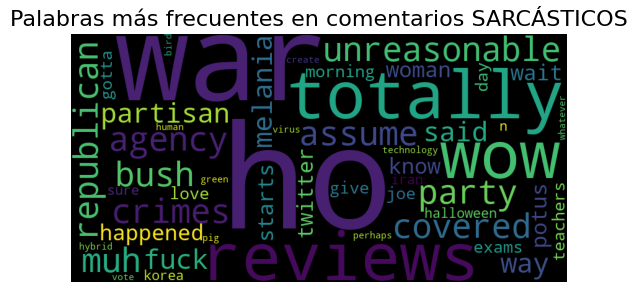

In [22]:
from wordcloud import WordCloud, STOPWORDS

# Creamos una nube de palabras (word cloud) para visualizar las palabras más frecuentes
# en comentarios sarcásticos
#
# Configuración del WordCloud:
wordcloud = WordCloud(
    background_color='black',  # Fondo negro para mejor contraste
    stopwords=STOPWORDS,       # Eliminamos palabras comunes sin significado (the, is, at, etc.)
    max_words=50,              # Mostramos máximo 50 palabras
    random_state=42,           # Semilla para reproducibilidad
    width=800,                 # Ancho de la imagen
    height=400                 # Alto de la imagen
)

# Generamos la nube de palabras con todos los comentarios sarcásticos (label==1)
# Convertimos a string porque WordCloud espera un texto largo
wordcloud.generate(str(df[df['label']==1]['comment']))

# Mostramos la nube de palabras como una imagen
plt.imshow(wordcloud)
plt.axis('off')  # Ocultamos los ejes
plt.title('Palabras más frecuentes en comentarios SARCÁSTICOS', fontsize=16)
plt.show()

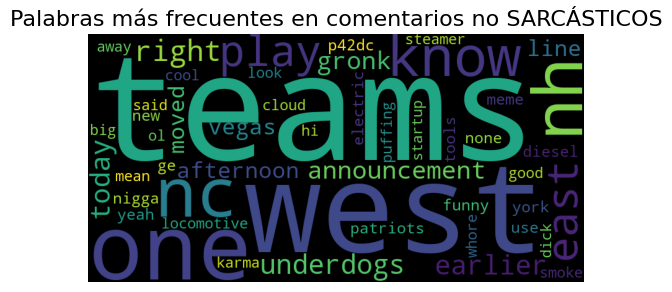

In [23]:
from wordcloud import WordCloud, STOPWORDS

# Creamos una nube de palabras (word cloud) para visualizar las palabras más frecuentes
# en comentarios sarcásticos
#
# Configuración del WordCloud:
wordcloud = WordCloud(
    background_color='black',  # Fondo negro para mejor contraste
    stopwords=STOPWORDS,       # Eliminamos palabras comunes sin significado (the, is, at, etc.)
    max_words=50,              # Mostramos máximo 50 palabras
    random_state=42,           # Semilla para reproducibilidad
    width=800,                 # Ancho de la imagen
    height=400                 # Alto de la imagen
)

# Generamos la nube de palabras con todos los comentarios sarcásticos (label==1)
# Convertimos a string porque WordCloud espera un texto largo
wordcloud.generate(str(df[df['label']==0]['comment']))

# Mostramos la nube de palabras como una imagen
plt.imshow(wordcloud)
plt.axis('off')  # Ocultamos los ejes
plt.title('Palabras más frecuentes en comentarios no SARCÁSTICOS', fontsize=16)
plt.show()

In [24]:
import plotly.graph_objs as go      # Objetos gráficos de Plotly
from plotly import tools            # Herramientas para crear subplots
import plotly.offline as py 

In [25]:
# =============================================================================
# ANÁLISIS DE FRECUENCIA DE UNIGRAMAS (PALABRAS INDIVIDUALES)
# =============================================================================
from collections import defaultdict

# Separamos los datos por clase
train1_df = df[df["label"]==1]  # Comentarios sarcásticos
train0_df = df[df["label"]==0]  # Comentarios no sarcásticos

## FUNCIÓN PARA GENERAR N-GRAMAS ##
def generate_ngrams(text, n_gram=1):
    """
    Genera n-gramas a partir de un texto.
    - n_gram=1: unigramas (palabras individuales)
    - n_gram=2: bigramas (pares de palabras consecutivas)
    - n_gram=3: trigramas (tripletas de palabras consecutivas)
    """
    # Tokenizamos: dividimos el texto en palabras individuales
    # Filtramos: eliminamos tokens vacíos y stopwords
    token = [token for token in text.lower().split(" ") 
             if token != "" if token not in STOPWORDS]
    
    # Generamos n-gramas usando zip con slicing
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    
    # Devolvemos lista de n-gramas como strings unidos
    return [" ".join(ngram) for ngram in ngrams]

## FUNCIÓN PARA CREAR GRÁFICO DE BARRAS HORIZONTAL ##
def horizontal_bar_chart(df, color):
    """
    Crea un gráfico de barras horizontal con Plotly
    """
    trace = go.Bar(
        y=df["word"].values[::-1],        # Palabras (invertidas para orden ascendente)
        x=df["wordcount"].values[::-1],   # Frecuencias (invertidas)
        showlegend=False,
        orientation='h',                   # Orientación horizontal
        marker=dict(color=color),
    )
    return trace

## GRÁFICO PARA COMENTARIOS NO SARCÁSTICOS ##
freq_dict = defaultdict(int)  # Diccionario para contar frecuencias
# Iteramos sobre todos los comentarios no sarcásticos
for sent in train0_df["comment"]:
    # Extraemos unigramas (palabras individuales)
    for word in generate_ngrams(sent):
        freq_dict[word] += 1  # Incrementamos contador

# Convertimos a DataFrame y ordenamos por frecuencia
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')  # Top 50 palabras

## GRÁFICO PARA COMENTARIOS SARCÁSTICOS ##
freq_dict = defaultdict(int)
# Iteramos sobre todos los comentarios sarcásticos
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')  # Top 50 palabras

## CREAMOS FIGURA CON DOS SUBPLOTS LADO A LADO ##
fig = tools.make_subplots(
    rows=1, cols=2, 
    vertical_spacing=0.04,
    subplot_titles=["Palabras frecuentes en comentarios NO sarcásticos", 
                    "Palabras frecuentes en comentarios SARCÁSTICOS"]
)

# Añadimos los gráficos a cada subplot
fig.append_trace(trace0, 1, 1)  # Subplot izquierdo
fig.append_trace(trace1, 1, 2)  # Subplot derecho

# Configuramos el layout de la figura
fig['layout'].update(
    height=1200, 
    width=900, 
    paper_bgcolor='rgb(233,233,233)', 
    title="Análisis de Frecuencia de Palabras (Unigramas)"
)

# Mostramos el gráfico interactivo
py.iplot(fig, filename='word-plots')

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:453: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [26]:
# =============================================================================
# ANÁLISIS DE FRECUENCIA DE BIGRAMAS (PARES DE PALABRAS)
# =============================================================================
# Similar al análisis anterior, pero ahora analizamos pares de palabras consecutivas
# Los bigramas capturan contexto y relaciones entre palabras

## BIGRAMAS PARA COMENTARIOS NO SARCÁSTICOS ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    # Generamos bigramas (n_gram=2)
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## BIGRAMAS PARA COMENTARIOS SARCÁSTICOS ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    # Generamos bigramas (n_gram=2)
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## CREAMOS FIGURA COMPARATIVA ##
fig = tools.make_subplots(
    rows=1, cols=2, 
    vertical_spacing=0.04,
    subplot_titles=["Bigramas frecuentes en comentarios NO sarcásticos", 
                    "Bigramas frecuentes en comentarios SARCÁSTICOS"]
)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(
    height=1200, 
    width=900, 
    paper_bgcolor='rgb(233,233,233)', 
    title="Análisis de Frecuencia de Bigramas"
)

py.iplot(fig, filename='word-plots')

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:453: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [27]:
# =============================================================================
# ANÁLISIS DE FRECUENCIA DE TRIGRAMAS (TRIPLETAS DE PALABRAS)
# =============================================================================
# Analizamos secuencias de 3 palabras consecutivas
# Los trigramas capturan aún más contexto y expresiones idiomáticas

## TRIGRAMAS PARA COMENTARIOS NO SARCÁSTICOS ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    # Generamos trigramas (n_gram=3)
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## TRIGRAMAS PARA COMENTARIOS SARCÁSTICOS ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    # Generamos trigramas (n_gram=3)
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## CREAMOS FIGURA COMPARATIVA ##
fig = tools.make_subplots(
    rows=1, cols=2, 
    vertical_spacing=0.04,
    subplot_titles=["Trigramas frecuentes en comentarios NO sarcásticos", 
                    "Trigramas frecuentes en comentarios SARCÁSTICOS"]
)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(
    height=1200, 
    width=900, 
    paper_bgcolor='rgb(233,233,233)', 
    title="Análisis de Frecuencia de Trigramas"
)

py.iplot(fig, filename='word-plots')

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:453: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Para convertir texto a números
from sklearn.linear_model import LogisticRegression          # Algoritmo de clasificación
from sklearn.pipeline import Pipeline                        # Para encadenar transformaciones
from sklearn.metrics import accuracy_score, confusion_matrix # Métricas de evaluación

In [29]:
vectorizer = TfidfVectorizer(
    stop_words = "english",
    ngram_range=(1,3),
    max_features=20000
)

classifier = LogisticRegression(
    max_iter=10000
)

In [30]:
pipeline = Pipeline([
    ('vectorizer',vectorizer),
    ('classifier', classifier)
]) 

In [31]:
pipeline.fit(X_train,y_train)

y_pred=pipeline.predict(X_test) 

print("=" * 70)
print("MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("=" * 70)
print("\nAccuracy (Exactitud):", accuracy_score(y_test, y_pred))
print("Interpretación: {:.2f}% de las predicciones son correctas".format(
    accuracy_score(y_test, y_pred) * 100))

print("\nConfusion Matrix (Matriz de Confusión):")
print(confusion_matrix(y_test, y_pred))
print("\nEstructura:")
print("                  Predicho: 0    Predicho: 1")
print("Real: 0 (no sarc)    VN             FP")
print("Real: 1 (sarcástico) FN             VP")

MÉTRICAS DE EVALUACIÓN DEL MODELO

Accuracy (Exactitud): 0.6787959733867577
Interpretación: 67.88% de las predicciones son correctas

Confusion Matrix (Matriz de Confusión):
[[73789 27227]
 [37706 63433]]

Estructura:
                  Predicho: 0    Predicho: 1
Real: 0 (no sarc)    VN             FP
Real: 1 (sarcástico) FN             VP


In [ ]:
comentario = 'sure, you are so inteligent' 
comentario.lower()

'sure , you are so inteligent'

In [37]:
print("Predicción del modelo:", pipeline.predict([comentario]))
print("0 = No sarcástico, 1 = Sarcástico")
print("\nProbabilidades de cada clase:", pipeline.predict_proba([comentario]))
print("Primera columna = P(no sarcástico), Segunda columna = P(sarcástico)")


Predicción del modelo: [1]
0 = No sarcástico, 1 = Sarcástico

Probabilidades de cada clase: [[0.18462195 0.81537805]]
Primera columna = P(no sarcástico), Segunda columna = P(sarcástico)


In [38]:
print("Número de coeficientes (características):", len(pipeline['classifier'].coef_[0]))
print("Esto corresponde a las palabras/n-gramas más importantes del vocabulario")

Número de coeficientes (características): 20000
Esto corresponde a las palabras/n-gramas más importantes del vocabulario


In [39]:
pipeline['vectorizer'].vocabulary_

{'le': np.int64(9670),
 'shite': np.int64(15715),
 'farmer': np.int64(5849),
 'rite': np.int64(14908),
 'dom': np.int64(4709),
 'correct': np.int64(3475),
 'ding': np.int64(4428),
 'dong': np.int64(4874),
 'fries': np.int64(6388),
 'rip': np.int64(14894),
 'boss': np.int64(2030),
 'hog': np.int64(7890),
 'yes': np.int64(19871),
 'discussing': np.int64(4495),
 'possible': np.int64(13418),
 'future': np.int64(6522),
 'pm': np.int64(13270),
 'bare': np.int64(1490),
 'face': np.int64(5736),
 'lying': np.int64(10529),
 'public': np.int64(13873),
 'order': np.int64(12401),
 'score': np.int64(15356),
 'political': np.int64(13331),
 'points': np.int64(13301),
 'really': np.int64(14235),
 'concern': np.int64(3245),
 'heavy': np.int64(7701),
 'lol': np.int64(10292),
 'forehead': np.int64(6243),
 'don': np.int64(4721),
 'mean': np.int64(10962),
 'don mean': np.int64(4795),
 'amazing': np.int64(842),
 '1v5': np.int64(154),
 'guy': np.int64(7363),
 'insane': np.int64(8446),
 'batshit': np.int64(153

In [40]:
import eli5 

In [42]:
eli5.show_weights(
    estimator=pipeline['classifier'],
    feature_names= pipeline['vectorizer'].get_feature_names_out(),
    top=100
)

Weight?,Feature
+6.441,obviously
+6.056,clearly
+5.753,totally
+5.019,gee
+4.801,forgot
+4.730,dropped
+4.420,yes sure
+4.401,unbiased
+4.243,human eye
+4.208,saw coming
